<a href="https://colab.research.google.com/github/stepsbtw/Machine-Learning/blob/main/02_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A Regressão Logística é bastante usada para classificação binária.
- 0 : Classe Negativa
- 1 : Classe Positiva (nosso target)

# Regressão Logística
Algoritmo de aprendizado usado para gerar a **probabilidade** de um objeto estar associado com uma classe específica.
- Pode modelar múltiplas classes (não só binária)

### Representação da Hipótese
Como queremos representar 0 <= h(x) <= 1, podemos utilizar uma função externa que encaixe os dados nesse intervalo de probabilidade.

- Vamos usar a **função logística** -> **sigmóide**

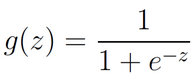

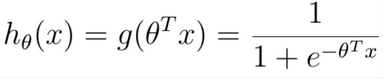

- O valor de sig(h(x)) vai ser a probabilidade de o valor x assumir ser da classe y.
Para classificação binária, usamos um **threshold** de 0.5, assim:
- y = 1 se h(x) >= 0
- y = 0 se h(x) < 0

## Fronteira de decisão
A fronteira é o conjunto de todos os pontos x que satisfazem:
- Pr( y = 1 | x ) = Pr( y = 0 | x ) = 0.5

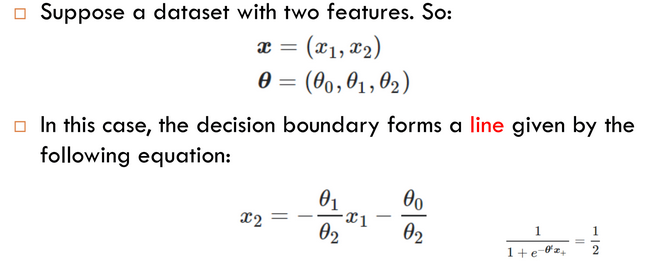

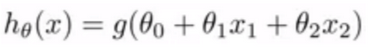

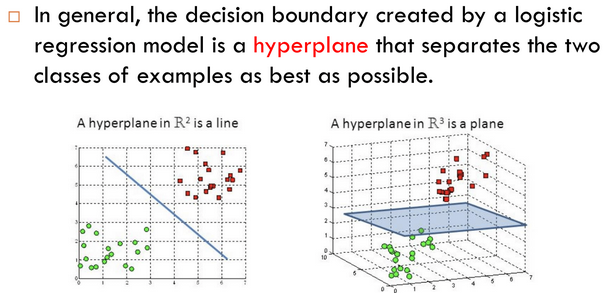

## Função de Custo
Quando x está entre [0,1],

- y = - log(x) está entre [-inf,0]
- y = - log(1 - x) está entre [0,+inf]

Para avaliar o quão boa uma predição é, precisamos de uma função:

- Custo(h(x),y) que diga se a probabilidade h(x) é distante de 1, custo alto (se label = 1) ou distante de 0, custo alto (se label = 0).

Ou seja, probabilidade ideal:
- quando y = 1, cost(h(x),y) = 0
- quando y = 0, cost(h(x),y) = 0

Mas quando estiver distante:
- quando y = 1, cost = +inf
- quando y = 0, cost = +inf

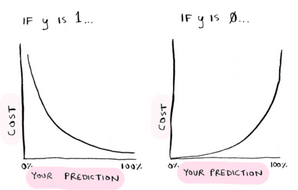

Nesse caso vamos usar Cost(h(x),y) =
- - log(h(x)), se y = 1
- - log(1 - h(x)), se y = 0

Note que, o custo só é zero quando:
- h(x) = y

Mas custo infinito quando:
- h(x) = 0, y = 1
- h(x) = 1, y = 0

Assim, **penalizamos o algoritmo** quando faz uma predição errada.

### Simplificando a função de custo:
Como y só pode ser 0 ou 1:
- if y == 1: C = - log(h(x))
- if y == 0: C = - log(1-h(x))

Isso pode ser escrito como:
- Cost(h(x),y) = - log(h(x))y - log(1 - h(x))(1 - y)

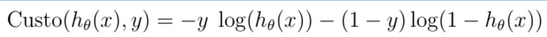

## Função de Custo para avaliar as diversas Hipóteses:

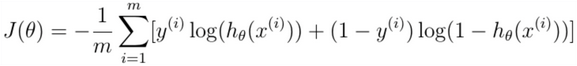

# Fitting Parameters (Optimization)
Vamos usar a **Descida de Gradiente**

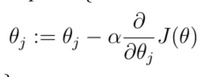

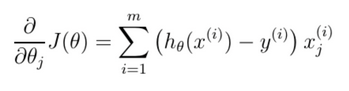



# Criando o DataSet Sintético

Para demonstrar, usaremos a Logistic Regression como Decision Boundary.

Um problema de classificação **Linearmente Separável**

Vamos gerar um dataset sintético com 2 FEATURES e 1 LABEL

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# lets generate random features
n_samples = 1000
X = np.random.randn(2, n_samples) # randn is normal # 2 FEATURES
print(X)
print(X.shape) # para 2 features, 1000 valores

[[-0.27525485  1.01767215 -0.13921978 ... -0.15374223  0.73974104
   0.56172963]
 [-1.08825453  0.41597307 -1.31744175 ... -0.45834252  0.24975641
  -0.75776803]]
(2, 1000)


In [ ]:
# our true function f that we want to approximate, the one which generates the data.
true_bias = -1 # feature 0
true_weight = np.array([2,-3]) # weight of each feature
true_weight = true_weight.reshape(-1,1) # 2d vector

# now, generate targets linearly separable. just create a linear combination of them
comb = true_weight.T.dot(X) + true_bias
print(comb.shape)

(1, 1000)


In [ ]:
# apply sigmoid to get probabilities values in [0,1]
def sigmoid(f):
  return 1 / (1 + np.exp(f))

probs = sigmoid(comb)

# now we just generate the binary target based on the probabilities # y = [1 if prob > 0.5 else 0 for prob in probs[0]]
y = (probs > 0.5).astype(int).flatten()
print(y)

[0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0
 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0
 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0
 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0
 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0
 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1
 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0
 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0
 0 0 1 1 0 1 1 1 1 0 0 0 

In [ ]:
# split data into train and test
split = int(n_samples * 0.8)

X_train = X[:,:split] # for all features, get upto split
X_test = X[:,split:] # for all features, get from split to end
y_train = y[:split]
y_test = y[split:]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2, 800) (800,) (2, 200) (200,)


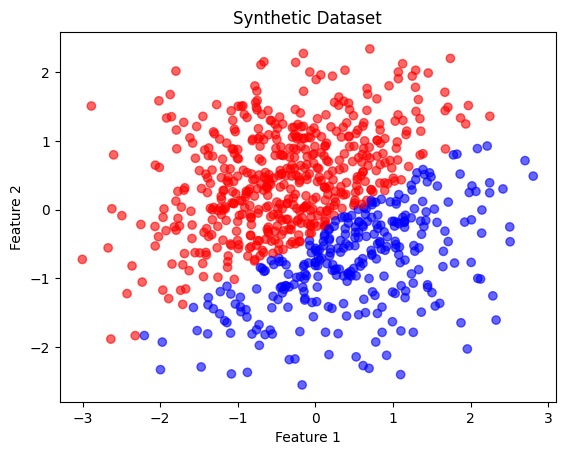

In [ ]:
# now we plot the synthetic dataset
plt.scatter(X_train[0,:], X_train[1,:], c=y_train, cmap="bwr", alpha=0.6)

# c = y_train shows the classes.

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic Dataset")
plt.show()

Esse gráfico mostra os valores das features entre [-3,3] e [-3,3].

O gráfico classifica de vermelho aqueles pontos onde a combinação y > 0.5 e azul aqueles onde y < 0.5

Perceba que é fácil visualizar que este Target é **Linearmente Separável**, precisamos ajustar uma reta que divida, faça a **Decision Boundary**.

# Implementação da Regressão Logística

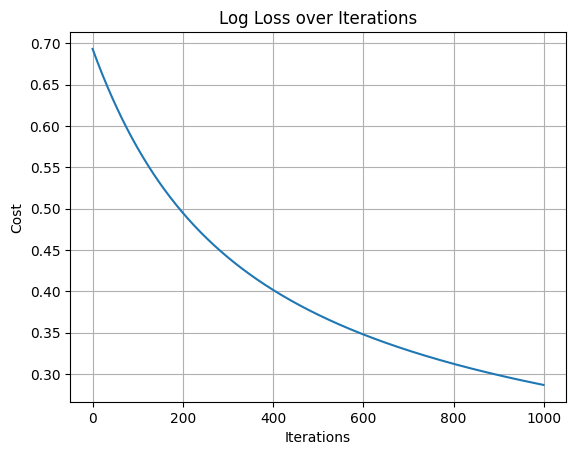

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(f):
  return 1 / (1 + np.exp(-f))

def logloss(y_pred, y): # binary cross entropy cost function
  loss = -(y * np.log(y_pred) + (1-y)*np.log(1-y_pred))
  cost = np.sum(loss) / y.shape[0] # or len(y)
  return cost

# Inicializar pesos e bias
weight = np.zeros((2, 1))  # shape: (2, 1)
bias = 0.0

# Hiperparâmetros
iterations = 1000
learning_rate = 0.01

# Treinamento
costs = []
for i in range(iterations):
    # Forward
    z = weight.T.dot(X_train) + bias
    y_pred = sigmoid(z)
    cost = logloss(y_pred, y_train)

    # Backward
    d_weight = X_train.dot((y_pred - y_train).T) / y_train.shape[0]
    d_bias = np.sum(y_pred - y_train) / y_train.shape[0]

    # Atualização dos parâmetros
    weight -= learning_rate * d_weight
    bias -= learning_rate * d_bias

    costs.append(cost)

# Plot da curva de custo
plt.plot(costs)
plt.title("Log Loss over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

# Usando Scikit Learn:

In [ ]:
from sklearn.linear_model import LogisticRegression

print(X_train.shape, y_train.shape)
X_train = X_train.T
X_test = X_test.T

logreg = LogisticRegression()
logreg = logreg.fit(X_train, y_train)

logreg.predict(X_test)
logreg.predict_proba(X_test)
logreg.score(X_test, y_test)

(2, 800) (800,)


1.0

# Caso 2: Dataset Não Linearmente Separável

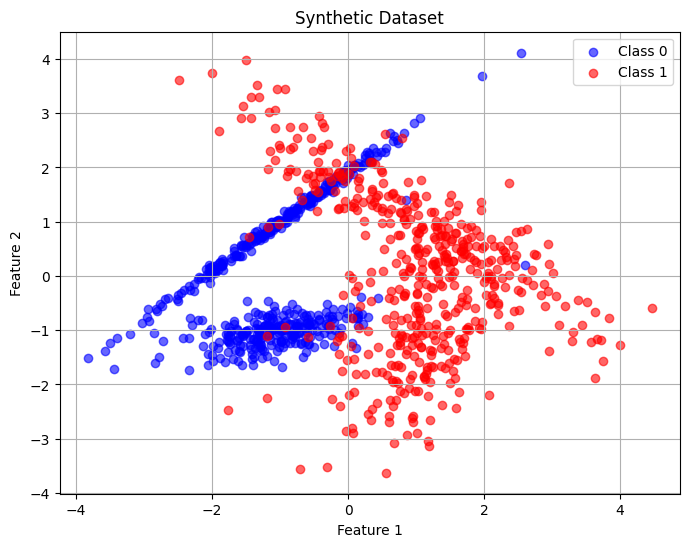

In [ ]:
from sklearn.datasets import make_classification

# Generate the synthetic dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0', alpha=0.6)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1', alpha=0.6)
plt.title('Synthetic Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

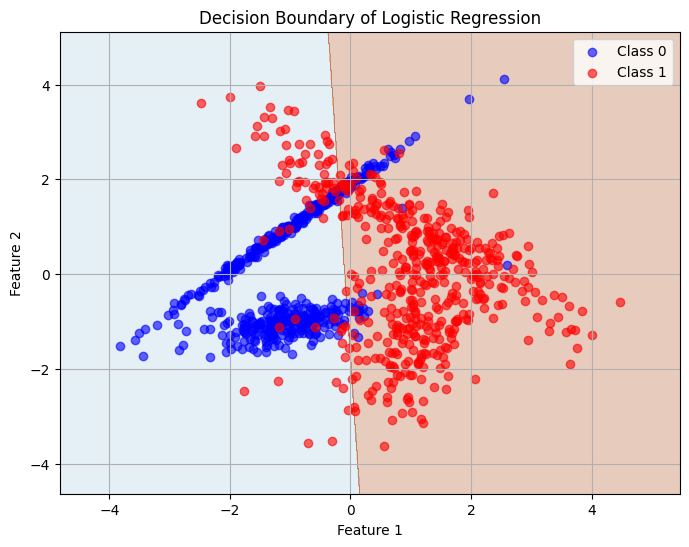

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a Logistic Regression classifier
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Plot the decision boundary
plt.figure(figsize=(8, 6))

# Create a mesh to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict probabilities on the mesh grid
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the dataset points
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0', alpha=0.6)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1', alpha=0.6)
plt.title('Decision Boundary of Logistic Regression')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()